In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Get Data

In [2]:
insurance_cost = pd.read_csv("D:/Python Data/Intro_to_DS/Medical_Cost.csv")
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_cost["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
insurance_cost["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
insurance_cost["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
insurance_cost_le = insurance_cost.copy()
insurance_cost_le["sex"] = labelencoder.fit_transform(insurance_cost_le['sex'])
print(labelencoder.classes_)
insurance_cost_le["smoker"] = labelencoder.fit_transform(insurance_cost_le['smoker'])
print(labelencoder.classes_)
insurance_cost_le["region"] = labelencoder.fit_transform(insurance_cost_le['region'])
print(labelencoder.classes_)
insurance_cost_le.head()

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<font color='orange'>sex:</font> female:0, male:1 \
<font color='orange'>smoker:</font> no:0, yes:1 \
<font color='orange'>region:</font> northeast:0, northwest:1, southeast:2, southwest:3

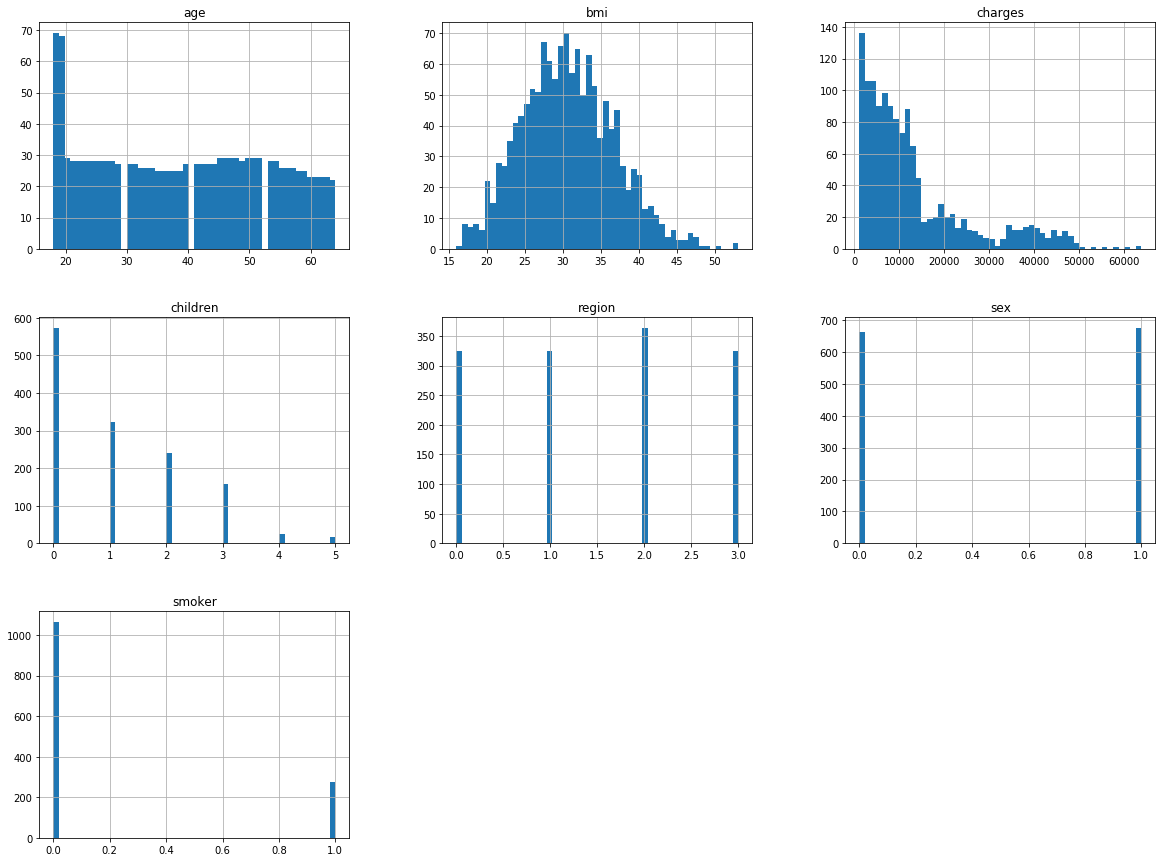

In [9]:
insurance_cost_le.hist(bins=50, figsize=(20,15))
plt.show()

When training our regressor, it may be important to take this into account especially if these scarce values(e.g. 4 - 5 children) have significant impact on the target value. In which case, the training data should incorporates these values to ensure the regressor has seen a representative subset of the data. We will follow-up on this later when we train our regressor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD200A1C88>,
      dtype=object)

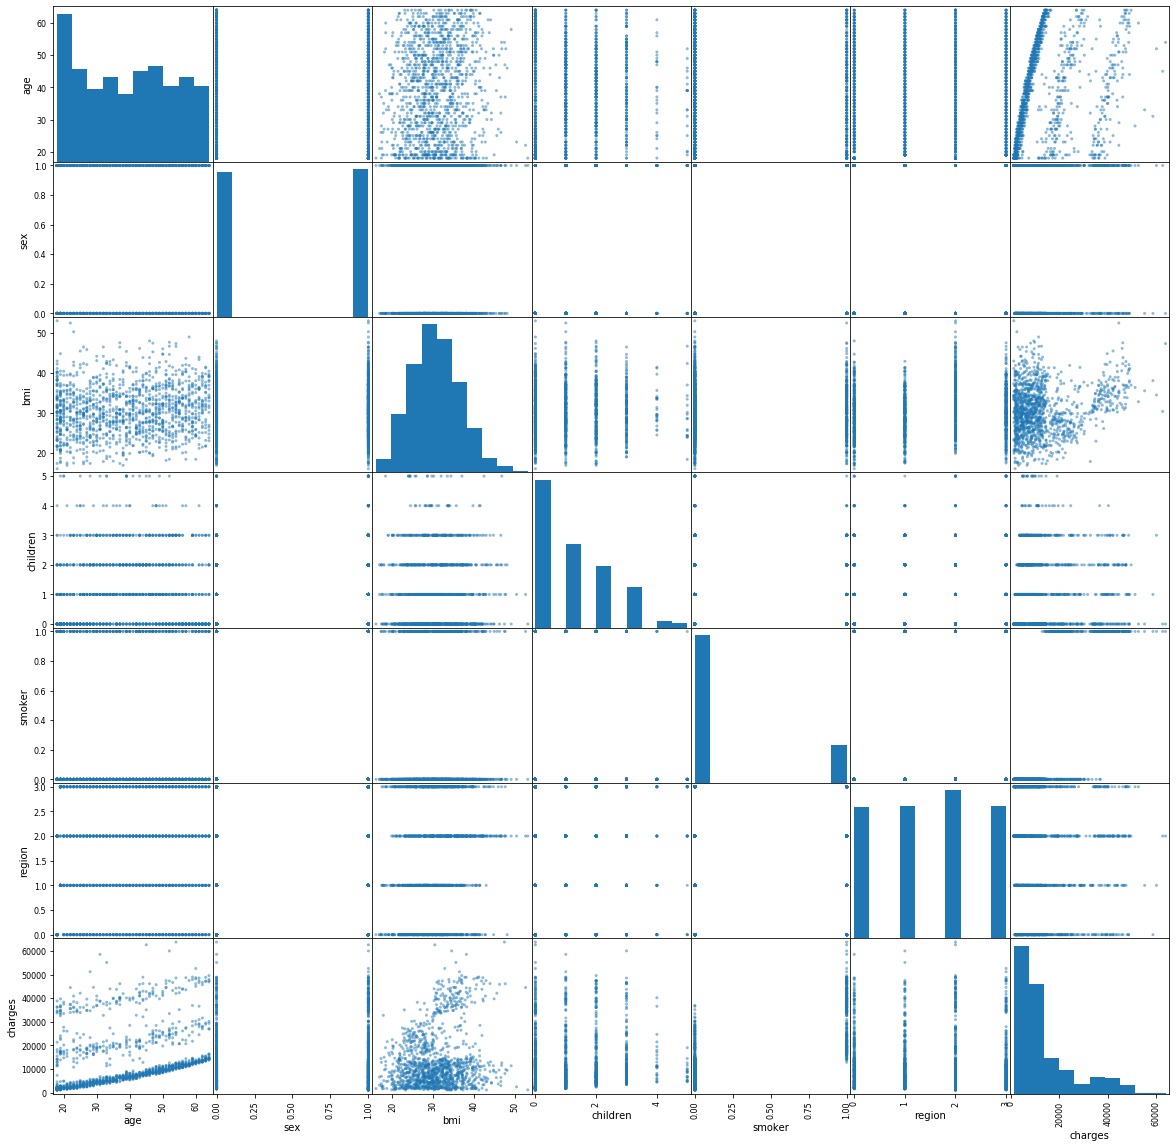

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]
scatter_matrix(insurance_cost_le[attributes], figsize=(20,20))

# Feature Selection

## Age vs Charges

Text(0.5, 1.0, 'Age vs Charges')

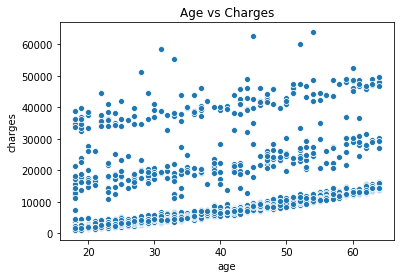

In [12]:
import seaborn as sns
sns.scatterplot(x='age', y='charges', data=insurance_cost)
plt.title("Age vs Charges")

### Age vs Charges: by smoker

Text(0.5, 1.0, 'Age vs Charges: by smoker')

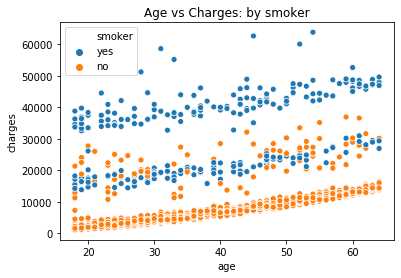

In [13]:
sns.scatterplot(x='age', y='charges', hue='smoker',data=insurance_cost)
plt.title("Age vs Charges: by smoker")

In [41]:
insurance_cost_smoker = insurance_cost[insurance_cost['smoker'] == 'yes']
insurance_cost_nonsmoker = insurance_cost[insurance_cost['smoker'] == 'no']

In [15]:
age_charge_smoker = insurance_cost_smoker[['age', 'charges']]
age_charge_smoker.corr()

,age,charges
age,1.000000,0.368224
charges,0.368224,1.000000


In [16]:
age_charge_nonsmoker = insurance_cost_nonsmoker[['age', 'charges']]
age_charge_smoker.corr()

,age,charges
age,1.000000,0.368224
charges,0.368224,1.000000


In [75]:
from sklearn.linear_model import LinearRegression
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(np.array(insurance_cost_smoker['age']).reshape(-1,1), np.array(insurance_cost_smoker['charges']))
age_new = np.arange(80).reshape(-1,1)
predict_smoker = lin_reg_smoker.predict(age_new)

In [76]:
lin_reg_nonsmoker = LinearRegression()
lin_reg_nonsmoker.fit(np.array(insurance_cost_nonsmoker['age']).reshape(-1,1), np.array(insurance_cost_nonsmoker['charges']))
predict_nonsmoker = lin_reg_nonsmoker.predict(age_new)

Text(0.5, 1.0, 'Age vs Charges: Non-smoker')

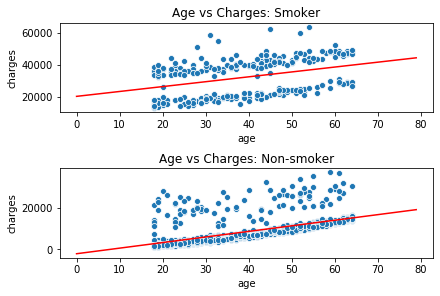

In [78]:
f, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
sns.scatterplot(x='age', y='charges', data=insurance_cost_smoker, ax=ax1)
sns.scatterplot(x='age', y='charges', data=insurance_cost_nonsmoker, ax=ax2)
ax1.plot(age_new, predict_smoker,"r-")
ax2.plot(age_new, predict_nonsmoker, "r-")
ax1.set_title("Age vs Charges: Smoker")
ax2.set_title("Age vs Charges: Non-smoker")

There is a positive correlation between age and charges. Higher age will have a higher insurance charges. \
For smoker: corr = 0.368224 \
For non-smoker: corr=0.368224

### Age vs Charges: by sex

Text(0.5, 1.0, 'Age vs Charges: by sex')

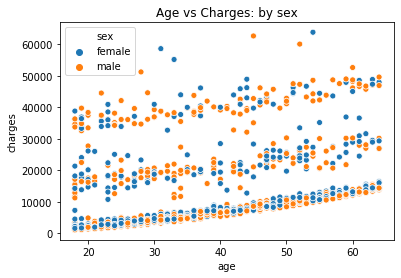

In [86]:
sns.scatterplot(x='age', y='charges', hue='sex',data=insurance_cost)
plt.title("Age vs Charges: by sex")

### Age vs Charges: by BMI

Text(0.5, 1.0, 'Age vs Charges: by bmi')

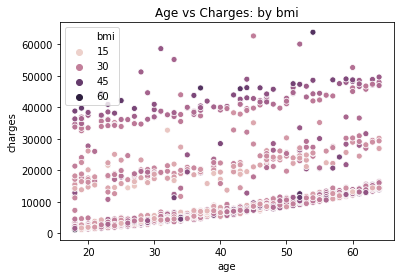

In [87]:
sns.scatterplot(x='age', y='charges', hue='bmi',data=insurance_cost)
plt.title("Age vs Charges: by bmi")

Most of the high charges individual have high bmi

### Age vs Charges: by Children

Text(0.5, 1.0, 'Age vs Charges: by children')

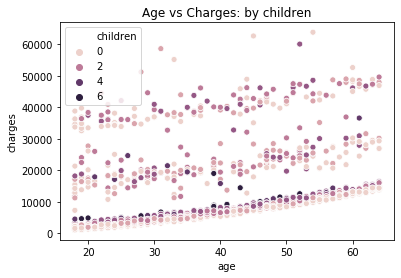

In [88]:
sns.scatterplot(x='age', y='charges', hue='children',data=insurance_cost)
plt.title("Age vs Charges: by children")

### Age vs Charges: by region

Text(0.5, 1.0, 'Age vs Charges: by region')

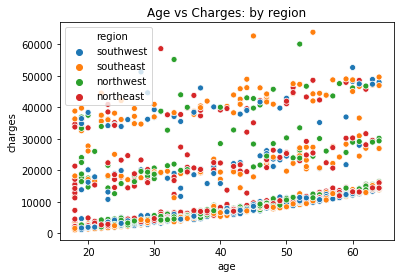

In [89]:
sns.scatterplot(x='age', y='charges', hue='region',data=insurance_cost)
plt.title("Age vs Charges: by region")

Summary for Age vs Sex:
1. by smoke: it is clear that for both smoke and non-smoke individual have a similar coefficient, but with different intercept (smoker: higher intercept)
2. by sex: no relationship
3. by BMI: most of the high charges individuals have a high BMI
4. by Childrem: more children tends to have lower charges
5. by region: no relationship

## Sex vs Charges

Text(0.5, 1, 'Sex vs Charges')

<Figure size 216x216 with 0 Axes>

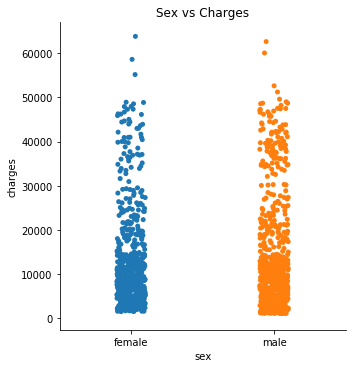

In [17]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.catplot(x='sex', y='charges', data=insurance_cost)
plt.title('Sex vs Charges')

The distribution charges look similar in both male and female, suggest that "Sex" is not very important in determining the insurance charges.

## BMI vs Charges

Text(0.5, 1.0, 'BMI vs Charges')

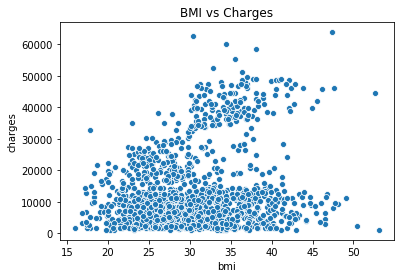

In [18]:
sns.scatterplot(x='bmi', y='charges', data=insurance_cost)
plt.title("BMI vs Charges")

### BMI vs Charges: by Smoker

Text(0.5, 1.0, 'BMI vs Charges: by smoker')

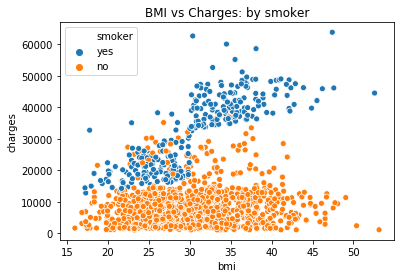

In [19]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance_cost)
plt.title("BMI vs Charges: by smoker")

No important relationship found

In [20]:
insurance_cost_smoker = insurance_cost[insurance_cost['smoker'] == 'yes']
bmi_charges_smoker = insurance_cost_smoker[['bmi', 'charges']]
bmi_charges_smoker.corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


In [21]:
insurance_cost_nonsmoker = insurance_cost[insurance_cost['smoker'] == 'no']
bmi_charges_nonsmoker = insurance_cost_nonsmoker[['bmi', 'charges']]
bmi_charges_nonsmoker.corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


In [82]:
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(np.array(bmi_charges_smoker['bmi']).reshape(-1,1), np.array(bmi_charges_smoker['charges']))
bmi_new = np.arange(10, 58).reshape(-1,1)
predict_smoker = lin_reg_smoker.predict(bmi_new)

In [84]:
lin_reg_nonsmoker = LinearRegression()
lin_reg_nonsmoker.fit(np.array(bmi_charges_nonsmoker['bmi']).reshape(-1,1), np.array(bmi_charges_nonsmoker['charges']))
predict_nonsmoker = lin_reg_nonsmoker.predict(bmi_new)

Text(0.5, 1.0, 'Non-smoker: BMI vs Chrges')

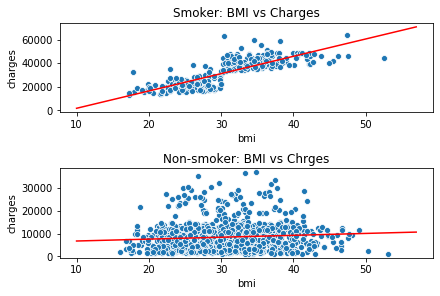

In [85]:
f, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
sns.scatterplot(x='bmi', y='charges', data=bmi_charges_smoker, ax=ax1)
sns.scatterplot(x='bmi', y='charges', data=bmi_charges_nonsmoker, ax=ax2)
ax1.plot(bmi_new, predict_smoker, "r-")
ax2.plot(bmi_new, predict_nonsmoker, "r-")
ax1.set_title('Smoker: BMI vs Charges')
ax2.set_title('Non-smoker: BMI vs Chrges')

We can discover a clear relationship after we divided the data points into smoker and non-smoker. \
\
For smoker: there is a +ve correlation between BMI and charges. (corr=0.806481)\
            there is a clear cut at bmi=30, charges is above 36000\
\
For non-smoker: there is no obvious correlation. (corr=0.084037)

Age, Sex, no. of children and Regions cannot provide additional information to BMI and charges

## No. of Children vs Charges

Text(0.5, 1, 'No. of Children vs Chrges')

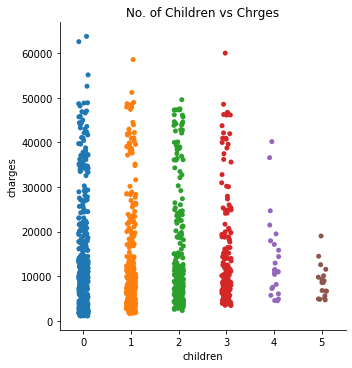

In [23]:
sns.catplot(x='children', y='charges', data=insurance_cost)
plt.title("No. of Children vs Chrges")

Charges for large family (with 4 - 5 children) tends to have lower charges.

## Smoker vs Charges

Text(0.5, 1, 'Smoker vs Charges')

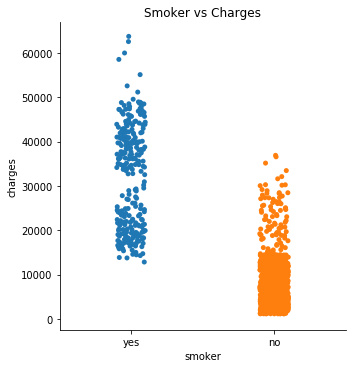

In [24]:
sns.catplot(x='smoker', y='charges', data=insurance_cost)
plt.title('Smoker vs Charges')

There is a cut between smoker and non-smoker. All smokers' insurance charges are above 14000. Most of the non-smokers have charges below 14000.

## Region vs Charges

Text(0.5, 1, 'Region vs Charges')

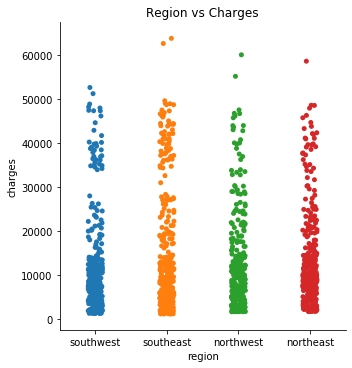

In [25]:
sns.catplot(x='region', y='charges', data=insurance_cost)
plt.title('Region vs Charges')

The distribution charges look similar between different regions, suggest that "Region" is not very important in determining the insurance charges.

Summarize the findings from the above feature plots: \
1.Age: +ve correlation (older people have higher charges)

2.Sex: the distribution of charges are similar in both sex: not an important feature

3.BMI: no obvious relation if we look at it solely. However, there is a clear +ve correlation for     smoker's bmi and charges.

4.No. of Children: Charges for large family (with 4 - 5 children) tends to have lower charges.

5.Smoker: Non-smoker tends to have lower charges while smokers tends to have higher charges.

6.Region: the distribution of charges are similar in different region: not an important feature

# Clustering

In [94]:
# create a data frame for clustering by removing the target attribute
insurance_cost_cluster = insurance_cost_le.drop('charges', axis=1)
insurance_cost_cluster.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [95]:
# Reduce to 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
insurance_cost_cluster_2 = pca.fit_transform(insurance_cost_cluster)

In [99]:
insurance_cost_cluster_2 = pd.DataFrame(insurance_cost_cluster_2)
insurance_cost_cluster_2.head()

,0,1
0,-20.336894,-1.541811
1,-20.990680,4.349017
2,-11.045077,3.002313
3,-6.663684,-7.595553
4,-7.302951,-1.375675


In [100]:
pca.explained_variance_ratio_

array([0.83285322, 0.15430606])

In [120]:
# clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(insurance_cost_cluster_2)
y_pred

array([2, 2, 2, ..., 2, 2, 0])

In [104]:
kmeans.cluster_centers_

array([[ 16.37631912,   0.10894999],
       [  0.48247721,  -0.27705958],
       [-15.80336702,   0.14775887]])

In [121]:
y_pred = pd.DataFrame(y_pred, columns={'y_pred'})
insurance_cost_cluster_2_final = pd.concat([insurance_cost_cluster_2, y_pred], axis=1)
insurance_cost_cluster_2_final.head()

,0,1,y_pred
0,-20.336894,-1.541811,2
1,-20.990680,4.349017,2
2,-11.045077,3.002313,2
3,-6.663684,-7.595553,1
4,-7.302951,-1.375675,1


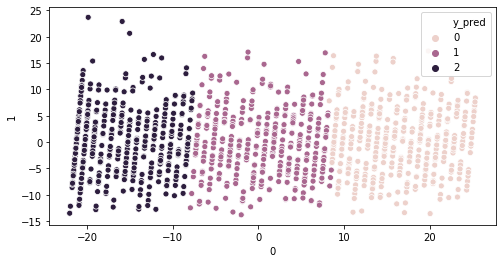

In [122]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=0, y=1, hue='y_pred', data=insurance_cost_cluster_2_final)

In [124]:
# combine the cluster result with the origional data set
insurance_cost_insight = pd.concat([insurance_cost, y_pred], axis=1)

## Cluster group 0

In [127]:
insurance_cost_insight[insurance_cost_insight['y_pred'] == 0].describe()

,age,bmi,children,charges,y_pred
count,442.000000,442.000000,442.000000,442.000000,442.0
mean,55.549774,31.725045,0.981900,17374.425379,0.0
std,4.872386,5.943099,1.183652,11473.700246,0.0
min,47.000000,18.050000,0.000000,7789.635000,0.0
25%,51.000000,27.360000,0.000000,10600.764225,0.0
50%,55.000000,31.760000,1.000000,12269.160450,0.0
75%,60.000000,36.095000,2.000000,20588.462048,0.0
max,64.000000,49.060000,5.000000,63770.428010,0.0


In [130]:
insurance_cost_insight['smoker'][insurance_cost_insight['y_pred'] == 0].value_counts()

no     366
yes     76
Name: smoker, dtype: int64

In [131]:
insurance_cost_insight['sex'][insurance_cost_insight['y_pred'] == 0].value_counts()

female    223
male      219
Name: sex, dtype: int64

In [134]:
insurance_cost_insight['region'][insurance_cost_insight['y_pred'] == 0].value_counts()

southeast    118
southwest    108
northwest    108
northeast    108
Name: region, dtype: int64

## Cluster Group 1

In [128]:
insurance_cost_insight[insurance_cost_insight['y_pred'] == 1].describe()

,age,bmi,children,charges,y_pred
count,425.000000,425.000000,425.000000,425.000000,425.0
mean,39.703529,30.413788,1.458824,13243.523264,1.0
std,4.672441,6.026287,1.189111,11870.067612,0.0
min,32.000000,16.815000,0.000000,3704.354500,1.0
25%,36.000000,26.180000,1.000000,6185.320800,1.0
50%,40.000000,29.900000,1.000000,7537.163900,1.0
75%,44.000000,34.400000,2.000000,18767.737700,1.0
max,48.000000,48.070000,5.000000,62592.873090,1.0


In [135]:
insurance_cost_insight['smoker'][insurance_cost_insight['y_pred'] == 1].value_counts()

no     327
yes     98
Name: smoker, dtype: int64

In [136]:
insurance_cost_insight['sex'][insurance_cost_insight['y_pred'] == 1].value_counts()

male      213
female    212
Name: sex, dtype: int64

In [137]:
insurance_cost_insight['region'][insurance_cost_insight['y_pred'] == 1].value_counts()

southeast    116
southwest    105
northwest    102
northeast    102
Name: region, dtype: int64

## Cluster Group 2

In [138]:
insurance_cost_insight[insurance_cost_insight['y_pred'] == 2].describe()

,age,bmi,children,charges,y_pred
count,471.000000,471.000000,471.000000,471.000000,471.0
mean,23.422505,29.892346,0.872611,9443.379164,2.0
std,4.300649,6.178407,1.167245,11663.201575,0.0
min,18.000000,15.960000,0.000000,1121.873900,2.0
25%,19.000000,25.650000,0.000000,2203.603900,2.0
50%,23.000000,29.800000,0.000000,3558.620250,2.0
75%,27.000000,33.715000,2.000000,15438.642375,2.0
max,31.000000,53.130000,5.000000,58571.074480,2.0


In [139]:
insurance_cost_insight['smoker'][insurance_cost_insight['y_pred'] == 2].value_counts()

no     371
yes    100
Name: smoker, dtype: int64

In [140]:
insurance_cost_insight['sex'][insurance_cost_insight['y_pred'] == 2].value_counts()

male      244
female    227
Name: sex, dtype: int64

In [141]:
insurance_cost_insight['region'][insurance_cost_insight['y_pred'] == 2].value_counts()

southeast    130
northwest    115
northeast    114
southwest    112
Name: region, dtype: int64

Group 0: Generally are non-smoker, old age (mean:55.5) --> mean charges: 17374.4 \
Group 1: Generally are non smoker, mid age (mean:39.7) --> mean Charges: 13243.5 \
Group 2: Generally are non-smoker, young age (mean: 23.4) --> mean charges: 9443.3

# Feature Processing: Handling Categorical Data

Due to we have three attributes are nominal type (sex, smoker and region). To avoid applying a rank order over these categories, we created dummies for different category. Value of 1 indicate that attribute apply to that individual whild value of 0 indicate not apply.

In [151]:
# change the categorical data in to dummies
from sklearn.preprocessing import LabelEncoder
insurance_cost_dum = insurance_cost.copy()
labelencoder = LabelEncoder()
insurance_cost_dum['sex'] = labelencoder.fit_transform(insurance_cost_dum['sex'])
insurance_cost_dum['smoker'] = labelencoder.fit_transform(insurance_cost_dum['smoker'])
insurance_cost_dum.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [152]:
insurance_cost_region_dummies = pd.get_dummies(insurance_cost_dum['region'])
insurance_cost_region_dummies = pd.DataFrame(insurance_cost_region_dummies).drop('northeast', axis=1)
#concat 2 dataframe into 1
insurance_cost_dum = pd.concat([insurance_cost_dum, insurance_cost_region_dummies], axis=1)
insurance_cost_dum = insurance_cost_dum.drop('region', axis=1)

In [153]:
insurance_cost_dum.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Train Test Set Splitting: Handling Sampling Bias

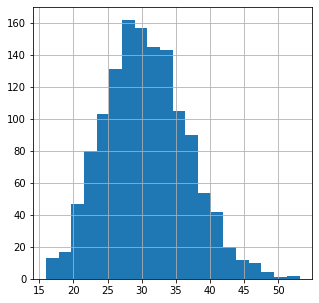

In [154]:
# "BMI" histogram the distribution is right-skewed
insurance_cost_dum['bmi'].hist(bins=20, figsize=(5,5))

When splitting our data, both training/test sets should include the scarce values (ex. >40) so that they are representative of the overall dataset. Otherwise, we run the risk of our regressor not having seen these points yet and having difficulty determining the insurance charges and/or conversely not having test data to evaluate our regressor thoroughly. \
We will use stratified splitting as opposed to normal splitting to handle sampling bias.

Text(0, 0.5, 'Charges')

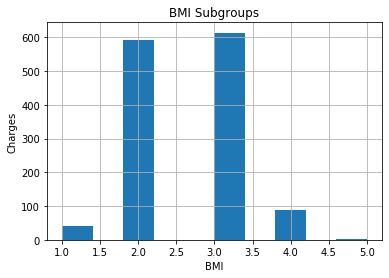

In [155]:
# Stratified splitting with "BMI"
# Divide "BMI" into subgroups and sample the correct proportion of data points from each subgroup
insurance_cost_dum["bmi_subgroups"] = pd.cut(insurance_cost_dum['bmi'],
                                             bins=[10, 20, 30, 40, 50, np.inf],
                                             labels=[1, 2, 3, 4, 5])
insurance_cost_dum["bmi_subgroups"].hist()
plt.title("BMI Subgroups")
plt.xlabel("BMI")
plt.ylabel("Charges")

In [156]:
# get the Train Test set
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(insurance_cost_dum, insurance_cost_dum["bmi_subgroups"]):
    stratified_train_set = insurance_cost_dum.loc[train_index]
    stratified_test_set = insurance_cost_dum.loc[test_index]

In [157]:
# compare the proportion with actual proportions
comparison_df = pd.DataFrame({"Overall Data bmi_subgroups Proportions": insurance_cost_dum['bmi_subgroups'].value_counts() / len(insurance_cost),
                              "Stratified Splitting bmi_subgroups Proportions": stratified_train_set["bmi_subgroups"].value_counts() / len(stratified_train_set)})
print(comparison_df)

   Overall Data bmi_subgroups Proportions  \
3                                0.458894   
2                                0.442451   
4                                0.065770   
1                                0.030643   
5                                0.002242   

   Stratified Splitting bmi_subgroups Proportions  
3                                        0.458879  
2                                        0.442991  
4                                        0.065421  
1                                        0.030841  
5                                        0.001869  


In [158]:
# remove the "Na_to_K_subgroups" feature from the train/test set
stratified_train_set.drop("bmi_subgroups", axis=1, inplace=True)
stratified_test_set.drop("bmi_subgroups", axis=1, inplace=True)

# ML Model Training

In [159]:
X_train = stratified_train_set.drop("charges", axis=1)
X_test = stratified_test_set.drop("charges", axis=1)

y_train = stratified_train_set['charges']
y_test = stratified_test_set['charges']

## 1. Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
from sklearn.metrics import mean_squared_error

lin_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
print("linear RMSE:", lin_rmse)

linear RMSE: 6424.935804901247


## 2. Lasso Regression

In [162]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
lasso_predictions = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print("lasso RMSE: ", lasso_rmse)

lasso RMSE:  6424.912044136888


## 3. Decision Tree Regressor

In [164]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [165]:
tree_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("tree RMSE: ", tree_rmse)

tree RMSE:  7232.3105181307765


## 4. Random Forest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [167]:
forest_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("forest RMSE: ", forest_rmse)

forest RMSE:  4989.800248382507
